<a href="https://colab.research.google.com/github/saspav/python_for_pro/blob/main/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%BD%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Промежуточная аттестация №1

Аттестационная работа состоит из двух заданий, которые проверяют ваши знания по основным темам, пройденным на лекциях в первом блоке.  
Для прохождения аттестации необходимо выполнить оба задания и загрузить результат на платформу в формате *.ipynb.

**Важно:** задания во многом творческие и не имеют единственно правильного решения!

# Задание 1:

**Описание:** Выберите интересный вам DataSet на https://www.kaggle.com/datasets (выгрузите его и приложите к решению ИЛИ включите в решение импорт DataSet-a из внешнего источника, который публично доступен без регистрации!).

**Ограничение:** размер DataSet-а не более 10Mb.

Выполните следующие шаги:
1. Получение данных:
    - Напишите код для загрузки данных вашего DataSet-a
2. Предварительная обработка данных:
    - Преобразуйте данные в DataFrame.
    - Выполните очистку данных (удалите пропущенные значения, если есть).
    - Добавьте новые вычисляемые атрибуты, если в них есть смысл.
3.   Вычисление статистик и показателей – от 3 до 5 по вашему DataSet-у исходя из предметной области.  
* Например, для коллекции фильмов это может быть:  
    - Количество фильмов по жанрам.
    - Средний рейтинг фильмов.
    - Фильмы с наивысшим рейтингом.
4. Визуализация данных – от 3 до 5 графиков по вашему DataSet-у исходя из предметной области.
* Например, для коллекции фильмов это может быть:
    - Гистограмма количества фильмов по годам или жанрам.
    - График распределения рейтингов фильмов.


Для исследования возьмем датасет от соревнования https://www.kaggle.com/competitions/competative-data-science-course-by-data-feeling/data

### Основные данные

#### 1. Мультиклассовая классификация - определить тип поломки, которая случится с машиной
#### 2. Регрессия - определить время до поломки, которая случится с машиной
####

🚗 Главное описание машин с информацией о поломках для обучения / прогноза - car_train.csv / car_test.csv.
Пояснение столбцов:

- car_id - идентификатор машины
- model / car_type / fuel_type- марка, класс и тип топлива машины
- car_rating / riders- общий рейтинг  и общее число поездок к концу 2021-го кода.
- year_to_start / year_to_work- года выпуска машины и начала работы в автопарке
- target_reg - время до поломки (отсутствует в тесте).
- target_class - класс поломки (всего 9 видов)

Дополнительные данные
Помимо описания машин, есть немаловажные данные о поездках на этих машинах за период трех месяцев, ремонтных работах и данных водителей. То есть, есть еще три дополнительные таблицы.

- rides_info.csv - информация про поездки
- driver_info.csv - информация про водителей
- fix_info.csv - информация про ремонт машин
​
Описание дополнительных данных:

🏇 Информация про поездки - rides_info.csv. Пояснение столбцов:
- user_id / car_id / ride_id - идентификаторы водителя, машины, поездки соответственно
- ride_date / rating - дата поездки и рейтинг, поставленный водителем
- ride_duration / distance / ride_cost -  длительность (время),  пройденное расстояние, стоимость поездки
- speed_avg / speed_max - средняя и максимальная скорости поездки соответственно
- stop_times / refueling - количество остановок (паузы) и флаг - была ли дозаправка.
- user_ride_quality - оценка манеры вождения в машины водителя, определенная скоринговой ML системой сервиса.
- deviation_normal - общий показатель датчиков о состоянии машины, относительно эталонных показателей (нормы).

👨‍💼 Информация про водителей - driver_info.csv. Пояснение столбцов:
- user_id / age / sex - идентификатор, возраст и пол водителя соответственно
- user_rating - общий рейтинг пользователя за все поездки к концу 2021-го года
- user_rides - общее количество поездок к концу 2021-го кода
- user_time_accident - число инцидентов (это могли быть аварии/штрафы/эвакуация машины)  
- first_ride_date - дата первой поездки

👷 Информация про ремонт машин - fix_info.csv. Пояснение столбцов:
- worker_id / car_id - идентификатор работника и машины соответсвенно
- work_type / work_duration - тип и длительность (в часах) проводимой работы
- destroy_degree - степень износа/поврежденности машины в случае поломки
- fix_date - время начала ремонта (время снятия машины с линии)

In [1]:
import re
import os
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

__import__("warnings").filterwarnings('ignore')

# Установим опции, которые помогут привести таблицу к желаемому виду
pd.set_option('display.max_columns', None) # реализуем возможность вывода всех столбцов на экран
pd.set_option('display.float_format', '{:.3f}'.format) # вывод float до 3 знаков после запятой

# Путь к датасету
DATA_PATH = Path('./data')

# проверяем, что все файлы есть в локальном каталоге, иначе берем их с гитхаба
if all(DATA_PATH.joinpath(f'{f}.csv').is_file()
       for f in 'car_test car_train driver_info fix_info rides_info'.split()):
    DATA_PATH = str(DATA_PATH)
else:
    DATA_PATH = 'https://raw.githubusercontent.com/saspav/python_for_pro/main/data'

In [2]:
# Чтение данных из файлов
test = pd.read_csv(f'{DATA_PATH}/car_test.csv')
train = pd.read_csv(f'{DATA_PATH}/car_train.csv')
rides = pd.read_csv(f'{DATA_PATH}/rides_info.csv')  # Взят сэмпл данных
fixes = pd.read_csv(f'{DATA_PATH}/fix_info.csv')  # Взят сэмпл данных
drivers = pd.read_csv(f'{DATA_PATH}/driver_info.csv')

#### Посмотрим на данные

In [3]:
train.head(10)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.780,2015,76163,2021,108.530,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.900,2015,78218,2021,35.200,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.300,2012,23340,2017,38.620,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.040,2011,1263,2020,30.340,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.700,2012,26428,2017,30.450,engine_fuel
5,b12101843B,Skoda Rapid,economy,petrol,2.360,2013,42176,2018,50.930,engine_ignition
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.320,2012,24611,2014,54.790,engine_overheat
7,O-2124190y,Tesla Model 3,premium,electro,3.900,2017,116872,2019,50.260,gear_stick
8,h16895544p,Kia Sportage,standart,petrol,3.500,2014,56384,2017,33.240,gear_stick
9,K77009462l,Smart ForFour,economy,petrol,4.560,2013,41309,2018,39.430,gear_stick


In [4]:
# Посмотрим на информацию о датафрейме
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [5]:
# Посмотрим на описательные статистики
train.describe()

,car_rating,year_to_start,riders,year_to_work,target_reg
count,2337.000,2337.000,2337.000,2337.000,2337.000
mean,4.354,2014.041,63711.444,2018.070,44.947
std,0.997,1.686,33755.012,2.159,17.580
min,0.980,2011.000,23.000,2014.000,18.920
25%,3.740,2013.000,41053.000,2016.000,31.670
50%,4.360,2014.000,64415.000,2018.000,40.170
75%,5.000,2015.000,86515.000,2020.000,54.790
max,8.900,2017.000,142862.000,2022.000,141.630


In [6]:
# Посмотрим на пропуски
train.isna().sum()

,0
car_id,0
model,0
car_type,0
fuel_type,0
car_rating,0
year_to_start,0
riders,0
year_to_work,0
target_reg,0
target_class,0


### Распределение видам поломок и их количеству:

In [7]:
train.target_class.value_counts(normalize=True)

,proportion
target_class,
engine_overheat,0.124
gear_stick,0.122
another_bug,0.119
engine_check,0.116
break_bug,0.116
engine_ignition,0.115
engine_fuel,0.112
electro_bug,0.107
wheel_shake,0.071


Распредение по видам поломок примерно одинаковое.

In [8]:
# Распределение по классам автомобилей
train.car_type.value_counts(normalize=True)

,proportion
car_type,
economy,0.657
standart,0.256
business,0.050
premium,0.036


Основу парка автомобилей составялет эконом класс, а вот премиум и бизнес по 3-5% от общего количества.

In [9]:
# Распределение по типам топлива - судя по данным этот признак особой пользы не принесет
train.fuel_type.value_counts(normalize=True)

,proportion
fuel_type,
petrol,0.979
electro,0.021


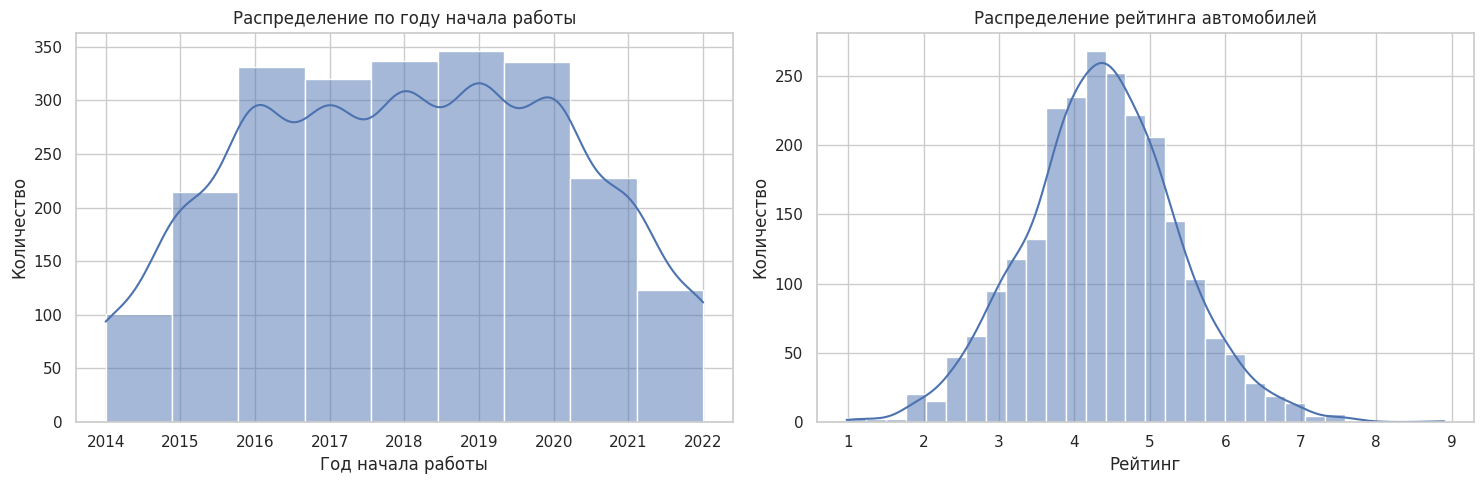

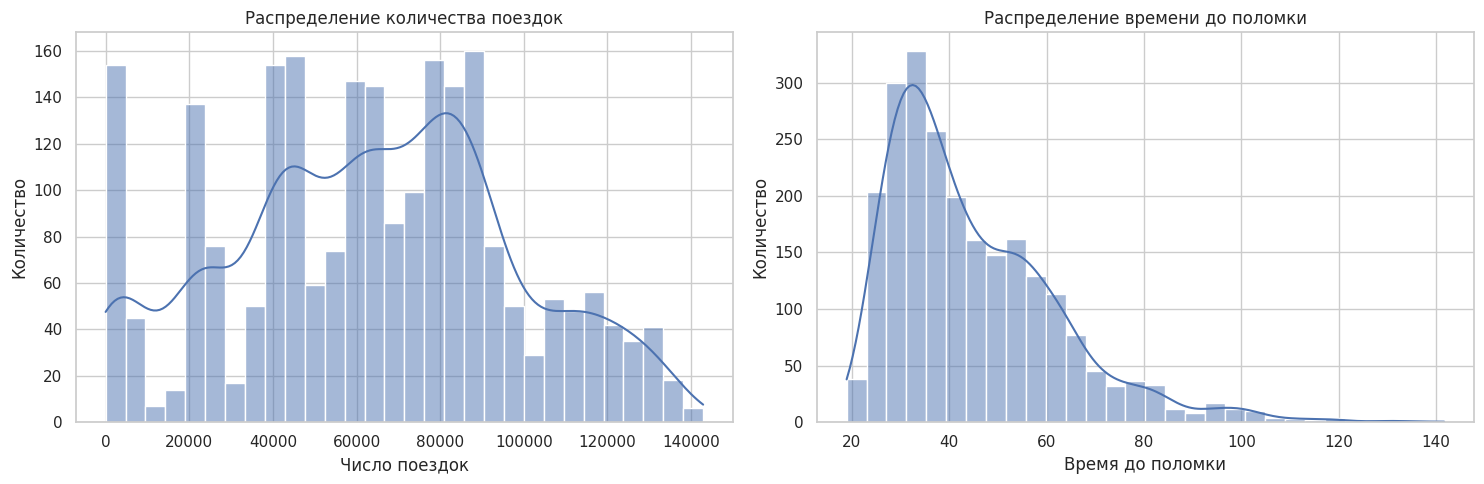

In [10]:
# Настройка стиля графиков
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))

# 1. Гистограмма по year_to_work
plt.subplot(1, 2, 1)
sns.histplot(data=train, x='year_to_work', bins=9, kde=True)
plt.title('Распределение по году начала работы')
plt.xlabel('Год начала работы')
plt.ylabel('Количество')

# 2. Распределение car_rating
plt.subplot(1, 2, 2)
sns.histplot(data=train, x='car_rating', bins=30, kde=True)
plt.title('Распределение рейтинга автомобилей')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

# Вторая группа графиков
plt.figure(figsize=(15, 5))

# 3. Распределение riders
plt.subplot(1, 2, 1)
sns.histplot(data=train, x='riders', bins=30, kde=True)
plt.title('Распределение количества поездок')
plt.xlabel('Число поездок')
plt.ylabel('Количество')

# 4. Распределение target_reg
plt.subplot(1, 2, 2)
sns.histplot(data=train, x='target_reg', bins=30, kde=True)
plt.title('Распределение времени до поломки')
plt.xlabel('Время до поломки')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()

Распределения по годам и рейтингу сильно похожи на нормальное распределение, для двух других можно применить методы мат.статистики для определения вида распределения.

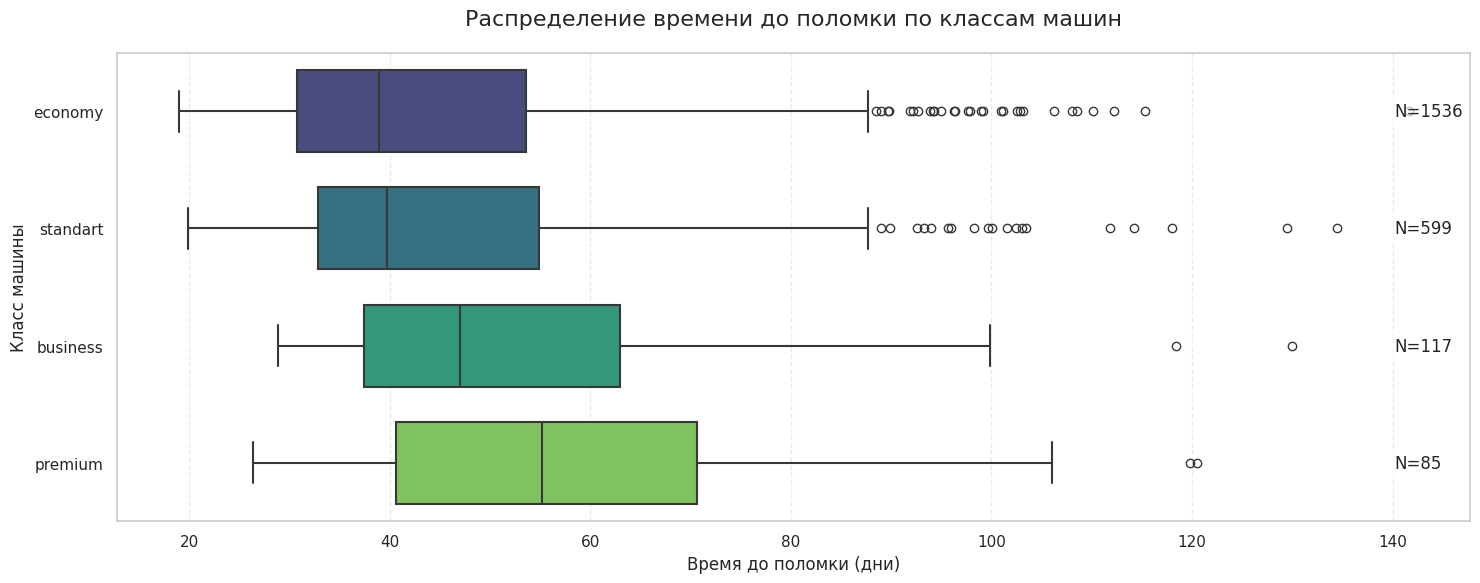

In [11]:
plt.figure(figsize=(15, 6))

sns.boxplot(
    data=train,
    y='car_type',
    x='target_reg',
    hue='car_type',  # Используем ту же переменную, что и для y
    orient='h',
    palette='viridis',
    width=0.7,
    linewidth=1.5,
    dodge=False,     # Отключаем автоматическое разделение (dodge)
    legend=False     # Отключаем легенду, так как она избыточна
)

# Добавляем заголовок и подписи
plt.title('Распределение времени до поломки по классам машин', fontsize=16, pad=20)
plt.xlabel('Время до поломки (дни)', fontsize=12)
plt.ylabel('Класс машины', fontsize=12)

# Улучшаем отображение сетки
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Добавляем аннотацию с количеством наблюдений для каждого класса
for i, car_type in enumerate(train['car_type'].value_counts().index):
    count = train[train['car_type'] == car_type].shape[0]
    plt.text(
        x=train['target_reg'].max() * 0.99,
        y=i,
        s=f'N={count}',
        va='center',
        ha='left',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

plt.tight_layout()
plt.show()

На боксплоте видно, что чем выше класс машины - тем больше она ходит до поломки.

In [12]:
test.head(10)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
0,P17494612l,Skoda Rapid,economy,petrol,4.800,2013,42269,2019
1,N-1530212S,Renault Sandero,standart,petrol,4.320,2015,90014,2016
2,B-1154399t,Smart ForTwo,economy,petrol,4.460,2015,82684,2017
3,F12725233R,Smart ForFour,economy,petrol,2.800,2014,68833,2021
4,l-1139189J,Skoda Rapid,economy,petrol,6.560,2013,42442,2021
5,U75286923j,Nissan Qashqai,standart,petrol,4.040,2014,59752,2018
6,T-7479831o,Renault Sandero,standart,petrol,4.380,2015,84497,2015
7,B-1369793u,Kia Rio X,economy,petrol,4.980,2015,73543,2022
8,Y-1289786X,Renault Kaptur,standart,petrol,3.500,2011,2670,2015
9,C29045893T,Kia Sportage,standart,petrol,4.340,2013,42630,2014


In [13]:
# Посмотрим на пропуски
test.isna().sum()

,0
car_id,0
model,0
car_type,0
fuel_type,0
car_rating,0
year_to_start,0
riders,0
year_to_work,0


Пропусков в тренировочных и тестовых данных нет

In [14]:
# Информация о водителях
drivers.head()

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.000,865,19.000,l17437965W,1,2019-4-2
1,46,7.900,2116,11.000,Z12362316j,0,2021-11-19
2,59,7.800,947,4.000,g11098715c,0,2021-1-15
3,37,7.000,18,4.000,U12618125q,0,2019-11-20
4,39,8.200,428,7.000,A14375829B,0,2019-7-23


In [15]:
# Посмотрим на информацию о датафрейме
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14182 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB


In [16]:
# Посмотрим на описательные статистики
drivers.describe()

,age,user_rating,user_rides,user_time_accident,sex
count,15153.000,15153.000,15153.000,14182.000,15153.000
mean,33.581,8.109,871.015,10.130,0.500
std,9.919,0.668,573.512,8.867,0.500
min,18.000,5.800,0.000,0.000,0.000
25%,25.000,7.700,421.000,4.000,0.000
50%,33.000,8.100,876.000,9.000,0.000
75%,41.000,8.600,1145.000,14.000,1.000
max,63.000,10.000,3316.000,86.000,1.000


In [17]:
# Посмотрим на пропуски
drivers.isna().sum()

,0
age,0
user_rating,0
user_rides,0
user_time_accident,971
user_id,0
sex,0
first_ride_date,0


Есть пропуски в поле "user_time_accident" - число инцидентов (это могли быть аварии/штрафы/эвакуация машины): можно заполнить нулем, но значение "0" есть как минимальное значение в этом поле, лучше будет заполнить "-1".

In [18]:
drivers['user_time_accident'] = drivers['user_time_accident'].fillna(-1)
drivers_columns = drivers.columns # сохраним список оригинальных колонок

In [19]:
# first_ride_date - попробуем привести к формату даты: выделим группы цифр и отформатируем
drivers['first_ride_date'] = drivers['first_ride_date'].str.findall('\d+')
drivers['first_ride_date'] = drivers['first_ride_date'].map(lambda z: '{:04}-{:02}-{:02}'.format(*map(int, z)))

drivers['frd'] = pd.to_datetime(drivers['first_ride_date'], format='%Y-%m-%d', errors='coerce')
# Посмотрим на пропуски
drivers.isna().sum()

,0
age,0
user_rating,0
user_rides,0
user_time_accident,0
user_id,0
sex,0
first_ride_date,0
frd,105


In [20]:
# Явная проблема с некоторыми датами, нужно посмотреть внимательнее на те строки, для которых не преобразовались даты:
drivers[drivers.frd.isna()]

,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date,frd
15,31,8.500,1127,8.000,p77402338b,0,2021-02-30,NaT
234,42,7.100,979,20.000,I21298037c,0,2019-02-29,NaT
641,28,7.800,1127,6.000,z21939688F,0,2021-02-30,NaT
747,45,7.600,1127,3.000,q12768126R,0,2021-02-30,NaT
764,44,9.100,978,7.000,Z14347125s,0,2019-02-29,NaT
...,...,...,...,...,...,...,...,...
14278,42,7.100,1122,0.000,s12770196V,0,2021-02-29,NaT
14467,38,7.900,974,4.000,C21979898V,0,2019-02-30,NaT
14499,36,7.300,1122,0.000,g21550272S,0,2021-02-29,NaT
14904,39,7.300,979,3.000,C10350312n,0,2019-02-29,NaT


А вот и причина: датасет вероятнее всего синтетический и генерация дат была бездумной: 29 и 30 февраля... Привет Барону Мюнхгаузену :)

In [21]:
drivers[drivers.frd.isna()].first_ride_date.value_counts()

,count
first_ride_date,
2019-02-30,42
2019-02-29,22
2021-02-30,16
2020-02-30,13
2021-02-29,7
2018-02-29,4
2018-02-30,1


In [22]:
# Распределение по годам:
drivers['year'] = drivers.first_ride_date.map(lambda z: int(z.split('-')[0]))
drivers['year'].value_counts().sort_index()

,count
year,
2017,169
2018,1982
2019,5448
2020,5477
2021,1908
2022,169


In [23]:
# Распределение по месяцам:
drivers['month'] = drivers.first_ride_date.map(lambda z: int(z.split('-')[1]))
drivers['month'].value_counts().sort_index()

,count
month,
1,1263
2,1263
3,1263
4,1262
5,1263
6,1263
7,1262
8,1263
9,1263


In [24]:
# Распределение по дням месяца:
drivers['day'] = drivers.first_ride_date.map(lambda z: int(z.split('-')[-1]))
drivers['day'].value_counts().sort_index()

,count
day,
1,506
2,505
3,505
4,505
5,505
6,505
7,505
8,505
9,505


Чудесная картинка: в датасете равное количество данных по месяцам и дням месяца, причем нет 31-го числа, зато есть 29 и 30 февраля :)

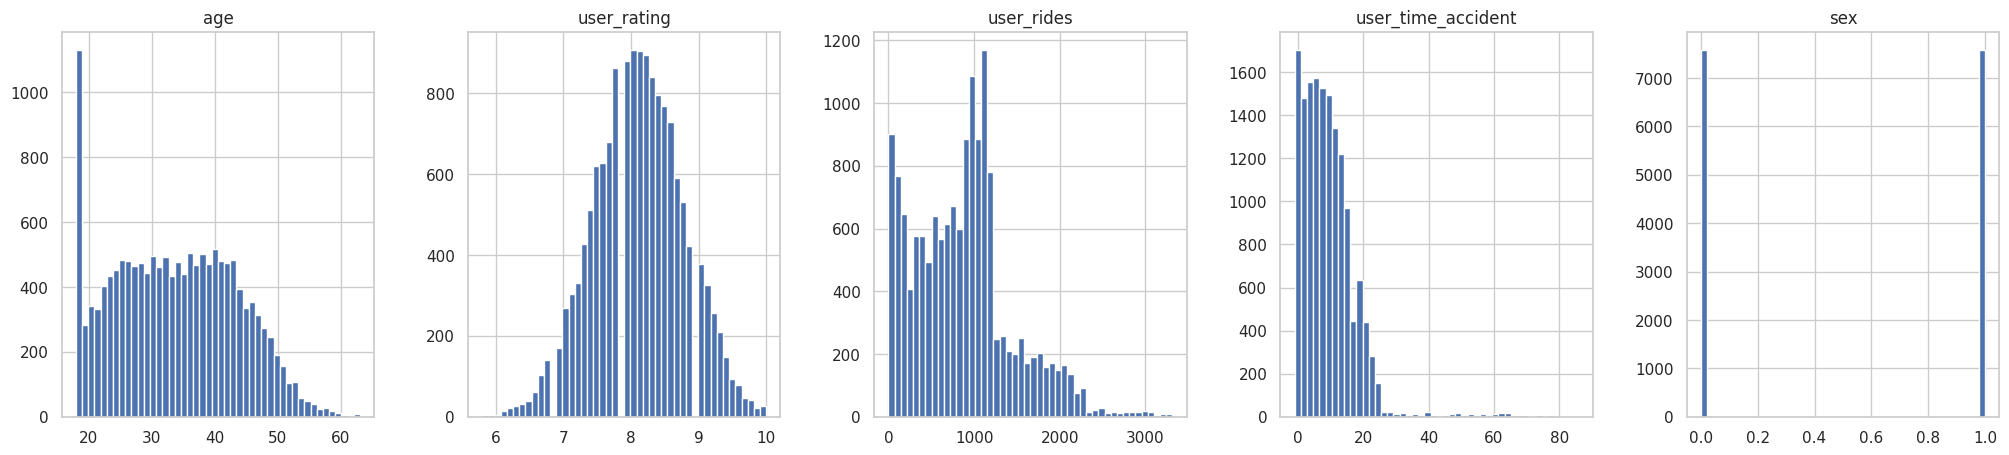

In [25]:
# Кратко посмотрим на распределения
drivers[drivers_columns].hist(figsize=(25, 5), layout = (-1, 5), bins=46);

In [26]:
# Подозрительные выбросы для возраста 18 лет (в 2 раза больше, чем последующее значение):
# возможно в 18 лет все ломанулись брать машины напрокат?

drivers['age'].value_counts().head(10)

,count
age,
18,1130
40,518
36,505
38,501
30,497
32,494
43,483
25,482
41,480


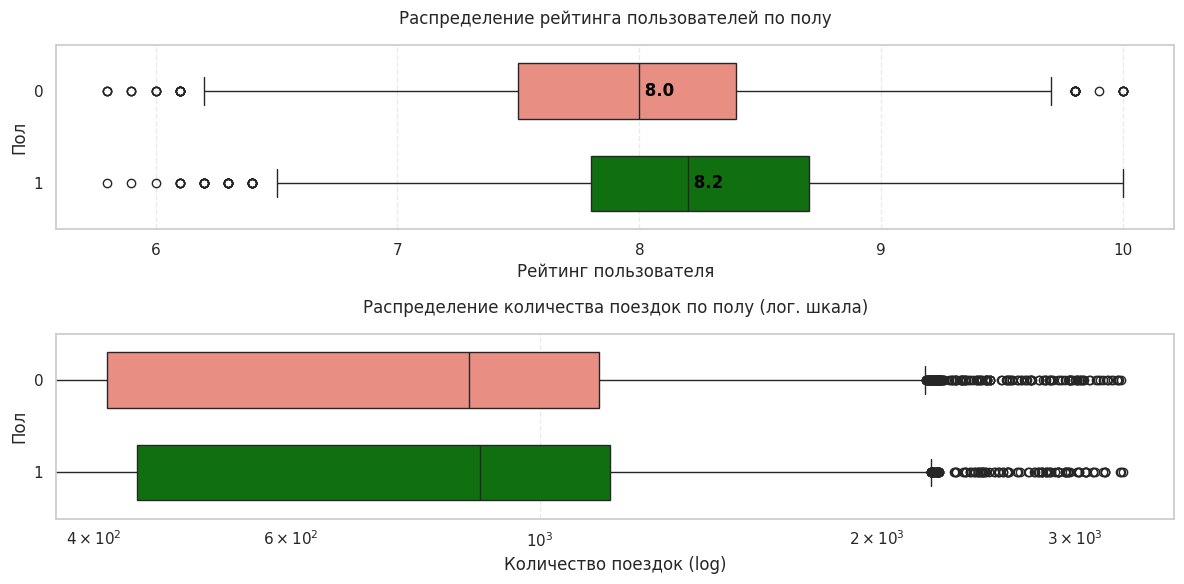

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Настройка стиля и размера графиков
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12, 6))

# 1. Горизонтальный боксплот для рейтинга пользователей
plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, первый график
ax1 = sns.boxplot(
    data=drivers,
    y='sex',
    x='user_rating',
    hue='sex',
    orient='h',  # Горизонтальная ориентация
    palette={1: "green", 0: "salmon"},
    legend=False,
    width=0.6,
)

# Добавляем аннотации с медианой
medians = drivers.groupby('sex')['user_rating'].median()
for i, sex in enumerate(medians.index):
    ax1.text(medians[sex], i, f' {medians[sex]:.1f}',
            va='center', fontweight='bold', color='black')

plt.title('Распределение рейтинга пользователей по полу', pad=15)
plt.xlabel('Рейтинг пользователя')
plt.ylabel('Пол')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# 2. Горизонтальный боксплот для количества поездок (с логарифмической шкалой)
plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, второй график
ax2 = sns.boxplot(
    data=drivers,
    y='sex',
    x='user_rides',
    hue='sex',
    orient='h',
    palette={1: "green", 0: "salmon"},
    legend=False,
    width=0.6,
)

# Настраиваем логарифмическую шкалу
ax2.set_xscale('log')
plt.title('Распределение количества поездок по полу (лог. шкала)', pad=15)
plt.xlabel('Количество поездок (log)')
plt.ylabel('Пол')
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Средний рейтинг и количество поездок у мужчин чуть выше.

In [28]:
# Информация о ремонтах машин
fixes.head()

,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,N-1530212S,LM,2020-2-9 20:25,repair,10.000,48
1,l-1139189J,PO,2020-3-2 19:11,reparking,1.000,28
2,u29695600e,QN,2020-2-2 20:10,reparking,10.000,64
3,h16895544p,PK,2020-2-4 22:30,repair,4.300,7
4,N18554472N,GL,2020-2-3 22:42,repair,4.700,11


In [29]:
# Посмотрим на информацию о датафрейме
fixes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_id          16218 non-null  object 
 1   worker_id       16218 non-null  object 
 2   fix_date        16218 non-null  object 
 3   work_type       16218 non-null  object 
 4   destroy_degree  16218 non-null  float64
 5   work_duration   16218 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 760.3+ KB


In [30]:
# Посмотрим на описательные статистики
fixes.describe()

,destroy_degree,work_duration
count,16218.000,16218.000
mean,3.618,26.053
std,2.758,12.812
min,1.000,1.000
25%,1.000,19.000
50%,3.900,26.000
75%,5.600,31.000
max,10.000,74.000


In [31]:
# Посмотрим на пропуски
fixes.isna().sum()

,0
car_id,0
worker_id,0
fix_date,0
work_type,0
destroy_degree,0
work_duration,0


In [32]:
# Дату тоже приведем в порядок
fixes['fix_date'] = fixes['fix_date'].str.findall('\d+')
fixes['fix_date'] = fixes['fix_date'].map(lambda z: '{:04}-{:02}-{:02} {:02}:{:02}'.format(*map(int, z)))

С датами в данных про ремент машин такая же история как с водителями: в датасете равное количество данных по месяцам и дням месяца, причем нет 31-го числа, зато есть 29 и 30 февраля :)

In [33]:
# Распределение по видам ремонта
fixes.work_type.value_counts(normalize=True)

,proportion
work_type,
repair,0.486
reparking,0.389
refuel_check,0.079
refuel,0.044
oil_change,0.002
refuel_reparking,0.000


In [34]:
rides['ride_date'] = rides['ride_date'].str.findall('\d+')
rides['ride_date'] = rides['ride_date'].map(lambda z: '{:04}-{:02}-{:02}'.format(*map(int, z)))
rides.sample(10)

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
30482,S78522253F,N62378224U,R1U,2020-01-16,4.420,52,514,45,56.000,1,1541.259,0,-9.391,5.517
24257,j11432772X,r-9955746M,X1c,2020-02-28,6.130,24,234,58,90.160,0,1378.050,0,-10.276,-35.723
36135,t20050467l,n21726530a,M1J,2020-02-25,2.330,41,569,45,66.000,1,530.096,0,11.635,23.117
36058,r13474875y,V48666541E,F1d,2020-01-09,2.700,39,424,25,58.000,2,728.758,0,9.558,29.462
59136,x13815868I,P58511672r,P1b,2020-03-16,3.440,6,50,42,60.000,0,176.782,0,-4.951,-48.308
18547,H27398836q,M-1528828l,Z1e,2020-03-27,4.630,32,316,50,67.177,0,1472.044,0,-10.322,45.117
7708,O18239023e,z-3757964J,W1z,2020-01-08,5.830,37,328,49,78.000,1,1530.302,0,-1.447,2.529
29998,U41290103O,m-1912665m,X1S,2020-01-05,9.450,49,436,40,53.000,1,1522.946,0,-2.421,-0.000
46179,q13506773t,c-8145167j,g1A,2020-01-21,5.480,180,1434,82,127.697,0,2614.406,0,9.540,11.891
38402,A13036859u,V-2127600s,b1g,2020-03-21,2.100,53,472,39,143.931,0,2107.487,0,-12.310,-23.947


In [35]:
# Посмотрим на информацию о поездках
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73950 entries, 0 to 73949
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            73950 non-null  object 
 1   car_id             73950 non-null  object 
 2   ride_id            73950 non-null  object 
 3   ride_date          73950 non-null  object 
 4   rating             73950 non-null  float64
 5   ride_duration      73950 non-null  int64  
 6   ride_cost          73950 non-null  int64  
 7   speed_avg          73950 non-null  int64  
 8   speed_max          73590 non-null  float64
 9   stop_times         73950 non-null  int64  
 10  distance           73950 non-null  float64
 11  refueling          73950 non-null  int64  
 12  user_ride_quality  73691 non-null  float64
 13  deviation_normal   73950 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 7.9+ MB


In [36]:
# Посмотрим на описательные статистики
rides.describe()

,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
count,73950.000,73950.000,73950.000,73950.000,73590.000,73950.000,73950.000,73950.000,73691.000,73950.000
mean,4.465,1703.955,21425.462,47.013,83.748,1.325,79729.662,0.000,-0.244,-1.316
std,2.136,6457.227,88763.747,12.688,29.691,2.340,318535.234,0.000,11.683,19.513
min,0.000,2.000,7.000,25.000,30.000,0.000,3.363,0.000,-65.777,-126.206
25%,3.110,27.000,296.000,38.000,63.982,0.000,794.318,0.000,-6.923,-9.306
50%,4.470,44.000,504.000,45.000,75.043,1.000,1454.268,0.000,0.103,-0.000
75%,5.820,68.000,882.000,52.000,97.084,2.000,2246.787,0.000,6.491,7.570
max,10.000,40393.000,1999494.000,100.000,200.000,22.000,3505937.392,0.000,57.032,95.022


В некоторых колонках: 'ride_duration', 'ride_cost' и 'distance' есть выбросы, посмотрим на них:

In [37]:
show_cols = ['ride_duration', 'ride_cost', 'distance']
mask = True
for col in show_cols:
    trs_outlet = rides[col].quantile(.995)  # Опрелелим выбросы как начение в 0.5% от максимума
    mask &= (rides[col] > trs_outlet)
    print(col, trs_outlet)

rides[mask]

ride_duration 37882.31500000006
ride_cost 515543.71000000206
distance 1972365.427087294


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
434,m12643705O,A-1952360y,c1y,2020-01-21,6.090,38337,613386,65,74.000,0,2541624.522,0,-3.775,-17.728
4510,u47677752t,L-2105285X,l1T,2020-01-19,4.850,39876,518381,50,58.000,2,2021527.636,0,4.465,17.776
4651,k49611824S,A-2110919g,m1I,2020-02-02,5.890,39145,548024,54,64.821,0,2176470.022,0,2.338,-17.931
5295,T89038443I,z49508882q,U1y,2020-02-12,4.480,39450,552296,54,101.189,1,2156849.515,0,3.924,-20.936
7014,i16414129B,J-2049569a,M1V,2020-02-16,3.390,40393,565495,51,56.000,1,2082420.597,0,-9.024,-48.948
8585,i14414538y,m70884293y,Z1K,2020-01-05,3.410,38993,779855,50,88.000,4,1977462.720,0,0.244,12.543
10413,I76153385t,I-5970052e,v1x,2020-01-08,4.420,39206,627290,61,98.354,1,2426746.436,0,2.849,-0.000
23330,J10929364J,w17315089Z,X1R,2020-01-25,2.630,39990,1999494,49,67.000,0,1993474.896,0,-15.169,-2.000
29940,V59992198h,X-2155322c,Y1e,2020-02-08,9.080,38531,539428,54,99.000,1,2109999.738,0,-6.862,1.983
30148,m13145626P,N-1337765t,z1E,2020-02-02,0.100,39006,1170174,89,133.589,0,3505937.392,0,8.821,23.205


Вроде не похоже на выбросы: просто брали машину в аренду на длительный срок.

In [38]:
# Посмотрим на пропуски
rides.isna().sum()

,0
user_id,0
car_id,0
ride_id,0
ride_date,0
rating,0
ride_duration,0
ride_cost,0
speed_avg,0
speed_max,360
stop_times,0


В данных есть пропуски, но для их заполнения соберем общий датафрейм:

In [39]:
# Объединим трейн и тест: если взять только трейн - то в итоговом ДФ будет очень много пропусков,
# т.к. rides - это семпл в 10% от испходных данных и не все комбинации user_id - car_id остались для трейна и теста
all_data = pd.concat([train[test.columns], test], ignore_index=True)

df = (rides
      .merge(all_data, on='car_id', how='left')
      .merge(drivers.drop(columns=['frd', 'year', 'month', 'day']), on='user_id', how='left')
     )
df.head()

,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,age,user_rating,user_rides,user_time_accident,sex,first_ride_date
0,a72053951k,d-5916656a,c1p,2020-02-11,2.920,35,449,34,43.859,0,1275.996,0,-14.143,-19.233,Skoda Rapid,economy,petrol,4.280,2017,118785,2020,26,9.200,1505,17.000,1,2018-07-17
1,S17760488O,z-8891400p,j1W,2020-02-11,6.530,48,572,41,76.000,0,1754.090,0,6.061,-2.834,Kia Rio,economy,petrol,4.180,2015,90732,2014,42,7.500,1098,2.000,0,2019-01-28
2,w21295014Q,s-1227750Q,y1C,2020-02-26,4.310,31,396,47,59.000,0,1493.416,0,21.084,3.919,VW Polo,economy,petrol,4.000,2011,87,2018,35,8.900,1083,12.000,1,2020-11-23
3,w20774105O,c75592211G,l1a,2020-01-15,4.650,26,280,68,81.481,0,1839.141,0,-5.312,0.000,Kia Sportage,standart,petrol,4.160,2013,42213,2016,45,8.300,1438,10.000,0,2021-05-22
4,O20523961f,S11426971O,K1e,2020-01-12,3.840,17,164,30,47.000,1,48.272,0,-5.749,-50.491,VW Polo,economy,petrol,4.200,2011,6711,2017,43,8.600,548,8.000,0,2019-06-22


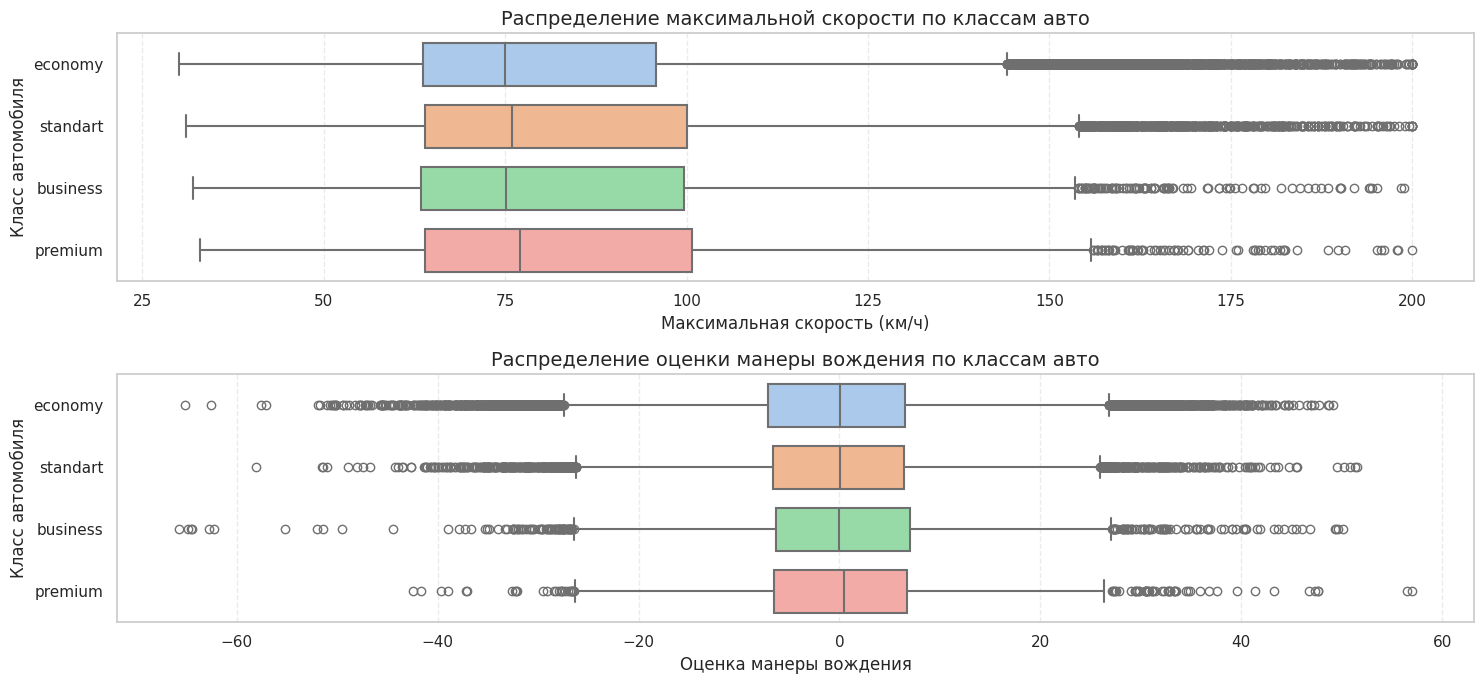

In [40]:
# Настройка стиля графиков
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(15, 7))

# 1. График максимальной скорости (верхний)
plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, первый график
sns.boxplot(
    data=df,
    x='speed_max',
    y='car_type',
    hue='car_type',
    dodge=False,
    legend=False,
    width=0.7,
    linewidth=1.5
)
plt.title('Распределение максимальной скорости по классам авто', fontsize=14)
plt.xlabel('Максимальная скорость (км/ч)')  # Исправлено название оси
plt.ylabel('Класс автомобиля')  # Исправлено название оси
plt.grid(axis='x', linestyle='--', alpha=0.4)

# 2. График оценки манеры вождения (нижний)
plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, второй график
sns.boxplot(
    data=df,
    x='user_ride_quality',
    y='car_type',
    hue='car_type',
    dodge=False,
    legend=False,
    width=0.7,
    linewidth=1.5
)
plt.title('Распределение оценки манеры вождения по классам авто', fontsize=14)
plt.xlabel('Оценка манеры вождения')  # Исправлено название оси
plt.ylabel('Класс автомобиля')  # Исправлено название оси
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()  # Улучшает расположение элементов
plt.show()

#### Заполнение пропусков speed_max и user_ride_quality, стратегии:
- Анализируя вышеприведенные боксплоты пропуски можно заполнить медианой или средним по каждой колонке, но возьмем по группам.
- взять среднее (по физическому смыслу для максимума среднее будет лучше медианы) speed_max и user_ride_quality по user_id, model,
- если пропуски в пред.пункте --> взять среднее speed_max и user_ride_quality по user_id, car_type
- если пропуски в пред.пункте --> взять среднее speed_max и user_ride_quality по user_id
- если пропуски в пред.пункте --> взять среднее speed_max и user_ride_quality по car_type
- если пропуски в пред.пункте --> взять среднее по всей колонке speed_max и user_ride_quality

In [41]:
# Заполнение пропусков
fillna_columns = ['speed_max', 'user_ride_quality']

for fillna_column in fillna_columns:
    df['avg_um'] = df.groupby(['user_id', 'model'])[fillna_column].transform('mean')
    df['avg_uct'] = df.groupby(['user_id', 'car_type'])[fillna_column].transform('mean')
    df['avg_user_id'] = df.groupby('user_id')[fillna_column].transform('mean')
    df['avg_um'] = df['avg_um'].fillna(df['avg_uct'])
    df['avg_um'] = df['avg_um'].fillna(df['avg_user_id'])
    df['avg_um'] = df['avg_um'].fillna(df[fillna_column].mean())
    # Заполняем пропуски в speed_max
    df[fillna_column] = df[fillna_column].fillna(df['avg_um'])
    # Удалим временные колонки
    df = df.drop(columns=['avg_um', 'avg_uct', 'avg_user_id'], errors='ignore')

# Посмотрим на пропуски
df[fillna_columns].isna().sum(), df.isna().sum().sum()

(speed_max            0
 user_ride_quality    0
 dtype: int64,
 np.int64(0))

### Создание новых признаков

In [42]:
# Количество уникальных водителей, средний пол для каждой машины
grp_car = df.groupby('car_id', as_index=False).agg(nunique_user_id=('user_id', 'nunique'),
                                                   mean_sex=('sex', 'mean'),
                                                   )
grp_car

,car_id,nunique_user_id,mean_sex
0,A-1049127W,24,0.625
1,A-1079539w,20,0.550
2,A-1162143G,18,0.444
3,A-1228282M,17,0.647
4,A-1339912r,18,0.389
...,...,...,...
4245,z73688663a,18,0.778
4246,z73740510r,21,0.286
4247,z86911952C,15,0.400
4248,z91353693Z,21,0.524


In [43]:
# По этим колонкам будем формировать статистики
agg_columns = ['age', 'speed_max', 'speed_avg', 'ride_duration', 'distance', 'ride_cost',
               'rating', 'stop_times', 'refueling', 'user_ride_quality', 'user_rating',
               'deviation_normal', 'user_rides', 'user_time_accident']

# Агрегирующие функции
agg_funcs = [np.median, np.std]

# По этим колонкам будем считать сумму
sum_columns = ['ride_duration', 'distance', 'ride_cost', 'stop_times', 'refueling']

grp_col = 'car_id' # Колонка для группировки

for agg_col in agg_columns:
    # Функции для подсчета статистик
    funcs = agg_funcs.copy()
    if agg_col in sum_columns and np.sum not in funcs:
        funcs.append(np.sum)
    grp = df.groupby(grp_col)[agg_col].agg(funcs)
    grp.columns = [f'{grp_col}_{agg_col}_{col}' for col in grp.columns]
    # Добавляем группировку в общую кучу
    grp_car = grp_car.merge(grp.reset_index(), on=grp_col, how='left')

grp_car

,car_id,nunique_user_id,mean_sex,car_id_age_median,car_id_age_std,car_id_speed_max_median,car_id_speed_max_std,car_id_speed_avg_median,car_id_speed_avg_std,car_id_ride_duration_median,car_id_ride_duration_std,car_id_ride_duration_sum,car_id_distance_median,car_id_distance_std,car_id_distance_sum,car_id_ride_cost_median,car_id_ride_cost_std,car_id_ride_cost_sum,car_id_rating_median,car_id_rating_std,car_id_stop_times_median,car_id_stop_times_std,car_id_stop_times_sum,car_id_refueling_median,car_id_refueling_std,car_id_refueling_sum,car_id_user_ride_quality_median,car_id_user_ride_quality_std,car_id_user_rating_median,car_id_user_rating_std,car_id_deviation_normal_median,car_id_deviation_normal_std,car_id_user_rides_median,car_id_user_rides_std,car_id_user_time_accident_median,car_id_user_time_accident_std
0,A-1049127W,24,0.625,33.000,8.452,94.127,36.434,45.000,18.475,47.000,4544.602,29392,1714.655,280578.664,1625358.570,479.000,41484.352,280628,4.175,1.820,1.000,0.963,20,0.000,0.000,0,-0.276,4.444,7.600,0.575,-4.447,4.839,609.000,672.195,9.000,4.577
1,A-1079539w,20,0.550,32.000,8.959,81.787,32.544,50.500,13.421,46.000,747.901,4974,1150.641,46418.132,234999.987,537.500,6191.659,48722,3.860,2.346,1.000,1.137,23,0.000,0.000,0,7.302,9.431,7.650,0.434,53.487,20.971,845.500,530.560,8.500,4.376
2,A-1162143G,18,0.444,36.000,8.939,84.000,32.512,42.000,8.509,44.000,198.933,1917,1145.826,727.262,22773.006,601.500,1677.468,19671,4.735,1.169,1.000,5.213,78,0.000,0.000,0,0.720,4.478,8.150,0.763,11.136,8.689,455.500,529.645,12.500,16.165
3,A-1228282M,17,0.647,28.000,9.045,75.000,37.239,41.000,16.719,36.000,14.958,652,1397.477,581.667,24894.858,353.000,217.566,7108,4.220,2.390,1.000,0.772,12,0.000,0.000,0,-16.443,9.077,7.800,0.857,19.518,17.963,920.000,518.362,8.000,4.579
4,A-1339912r,18,0.389,35.000,9.490,71.939,8.247,46.000,7.253,33.500,8514.691,39197,1124.280,382706.589,1737239.461,450.000,68075.821,330127,4.205,1.920,1.000,0.998,19,0.000,0.000,0,-8.546,5.754,7.850,0.707,26.274,8.821,855.500,665.070,8.000,19.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,z73688663a,18,0.778,30.500,9.817,80.534,26.767,49.500,9.799,32.500,8313.038,35806,1440.970,448079.633,1923830.627,358.000,83124.101,358408,5.845,2.253,0.000,0.575,5,0.000,0.000,0,-1.655,5.764,8.150,0.646,-18.308,10.802,536.000,556.501,6.500,15.971
4246,z73740510r,21,0.286,37.000,9.523,78.441,11.340,45.000,9.556,41.000,501.815,5052,1502.255,1049.815,32045.195,488.000,6260.797,59419,5.060,2.082,1.000,4.539,63,0.000,0.000,0,14.679,7.049,8.200,0.775,0.690,17.104,1032.000,441.246,3.000,15.447
4247,z86911952C,15,0.400,32.000,8.590,81.000,29.273,40.000,14.212,57.000,10963.387,61162,1220.495,342877.101,1920465.938,472.000,105231.955,606004,5.600,2.653,1.000,0.845,15,0.000,0.000,0,-4.624,4.718,7.800,0.552,-27.447,16.409,876.000,786.384,6.000,5.083
4248,z91353693Z,21,0.524,33.000,10.235,60.000,15.587,46.000,8.159,35.000,49.123,893,1189.829,788.200,23699.046,344.000,638.934,10066,5.340,2.092,1.000,0.730,14,0.000,0.000,0,7.043,6.087,7.900,0.508,-10.325,15.465,1057.000,549.994,7.000,4.036


In [44]:
# Количество: уникальных ремонтников и ремонтных работ. Самый частый тип ремонта.
get_series_mode = lambda z: pd.Series.mode(z)[0]
grp = fixes.groupby('car_id').agg(nunique_worker_id=('worker_id', 'nunique'),
                                  nunique_work_type=('work_type', 'nunique'),
                                  mode_work_type=('work_type', get_series_mode),
                                  ).reset_index()
grp

,car_id,nunique_worker_id,nunique_work_type,mode_work_type
0,A-1049127W,4,3,reparking
1,A-1079539w,8,2,repair
2,A-1162143G,2,1,reparking
3,A-1228282M,3,2,reparking
4,A-1339912r,1,1,repair
...,...,...,...,...
4156,z73688663a,4,3,repair
4157,z73740510r,3,2,repair
4158,z86911952C,4,3,repair
4159,z91353693Z,5,2,repair


In [45]:
# Добавляем группировку в общую кучу
grp_car = grp_car.merge(grp, on='car_id', how='left').fillna(0)

In [46]:
# Добавляем статистики по:
# destroy_degree - степень износа/поврежденности машины в случае поломки
# по work_duration - тип и длительность (в часах) проводимой работы
grp = fixes.pivot_table(index='car_id',
                        columns='work_type',
                        values=['destroy_degree', 'work_duration'],
                        aggfunc=['min', 'max', 'median']).fillna(0)
# Переименуем колонки
grp.columns = [f'{i[2]}_{i[1]}_{i[0]}' for i in grp.columns]
grp.reset_index(inplace=True)
grp

,car_id,oil_change_destroy_degree_min,refuel_destroy_degree_min,refuel_check_destroy_degree_min,refuel_reparking_destroy_degree_min,repair_destroy_degree_min,reparking_destroy_degree_min,oil_change_work_duration_min,refuel_work_duration_min,refuel_check_work_duration_min,refuel_reparking_work_duration_min,repair_work_duration_min,reparking_work_duration_min,oil_change_destroy_degree_max,refuel_destroy_degree_max,refuel_check_destroy_degree_max,refuel_reparking_destroy_degree_max,repair_destroy_degree_max,reparking_destroy_degree_max,oil_change_work_duration_max,refuel_work_duration_max,refuel_check_work_duration_max,refuel_reparking_work_duration_max,repair_work_duration_max,reparking_work_duration_max,oil_change_destroy_degree_median,refuel_destroy_degree_median,refuel_check_destroy_degree_median,refuel_reparking_destroy_degree_median,repair_destroy_degree_median,reparking_destroy_degree_median,oil_change_work_duration_median,refuel_work_duration_median,refuel_check_work_duration_median,refuel_reparking_work_duration_median,repair_work_duration_median,reparking_work_duration_median
0,A-1049127W,0.000,0.000,8.000,0.000,7.200,1.000,0.000,0.000,46.000,0.000,31.000,23.000,0.000,0.000,8.000,0.000,7.200,1.000,0.000,0.000,46.000,0.000,31.000,34.000,0.000,0.000,8.000,0.000,7.200,1.000,0.000,0.000,46.000,0.000,31.000,28.500
1,A-1079539w,0.000,0.000,0.000,0.000,4.100,1.000,0.000,0.000,0.000,0.000,12.000,27.000,0.000,0.000,0.000,0.000,7.400,9.000,0.000,0.000,0.000,0.000,42.000,56.000,0.000,0.000,0.000,0.000,5.800,1.000,0.000,0.000,0.000,0.000,25.000,31.000
2,A-1162143G,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,23.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,30.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,26.500
3,A-1228282M,0.000,0.000,0.000,0.000,4.400,1.000,0.000,0.000,0.000,0.000,10.000,26.000,0.000,0.000,0.000,0.000,4.400,1.000,0.000,0.000,0.000,0.000,10.000,28.000,0.000,0.000,0.000,0.000,4.400,1.000,0.000,0.000,0.000,0.000,10.000,27.000
4,A-1339912r,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,32.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,32.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,32.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,z73688663a,0.000,0.000,1.000,0.000,5.000,1.000,0.000,0.000,28.000,0.000,25.000,29.000,0.000,0.000,1.000,0.000,5.000,1.000,0.000,0.000,28.000,0.000,29.000,29.000,0.000,0.000,1.000,0.000,5.000,1.000,0.000,0.000,28.000,0.000,27.000,29.000
4157,z73740510r,0.000,0.000,0.000,0.000,6.400,1.000,0.000,0.000,0.000,0.000,27.000,21.000,0.000,0.000,0.000,0.000,6.900,1.000,0.000,0.000,0.000,0.000,29.000,21.000,0.000,0.000,0.000,0.000,6.650,1.000,0.000,0.000,0.000,0.000,28.000,21.000
4158,z86911952C,0.000,0.000,1.000,0.000,5.400,1.000,0.000,0.000,26.000,0.000,18.000,30.000,0.000,0.000,1.000,0.000,7.500,1.000,0.000,0.000,26.000,0.000,37.000,30.000,0.000,0.000,1.000,0.000,6.450,1.000,0.000,0.000,26.000,0.000,27.500,30.000
4159,z91353693Z,0.000,0.000,0.000,0.000,5.900,1.000,0.000,0.000,0.000,0.000,19.000,18.000,0.000,0.000,0.000,0.000,6.800,1.000,0.000,0.000,0.000,0.000,33.000,19.000,0.000,0.000,0.000,0.000,6.800,1.000,0.000,0.000,0.000,0.000,28.000,18.500


In [47]:
# Добавляем группировку в общую кучу
grp_car = grp_car.merge(grp, on='car_id', how='left').fillna(0)

In [48]:
# Смотрим на пропуски
grp_car.isna().sum().sum()

np.int64(0)

### Добавляем новые признаки к тренировочной и тестовой выборке

In [49]:
train_df = train.merge(grp_car, on=['car_id'], how='left')
test_df = test.merge(grp_car, on=['car_id'], how='left')

In [50]:
# Смотрим на пропуски
train_df.shape, train_df.isna().sum().sum(), test_df.shape, test_df.isna().sum().sum(),

((2337, 84), np.int64(0), (1913, 82), np.int64(0))

### Всё хорошо, данные готовы для обучения модели

# Задание 2:

Некоторые системы выстраивают схему данных в базе в несколько необычном формате:  
в одной таблице хранятся экземпяры сущностей, а в другой пары их атрибутов (название атрибута - значение атрибута).  
Такая модель хранения назвается EAV - Entity Atribute Value.

Будучи разработчиком системы вы можете не подозревать, какие подводные камни могут быть с этим связаны.

Рассмотрим простой пример, допустим у вас есть 2 таблиц в такой схеме хранения:
1) Таблица и базовой информацией о пользователях - users:

2) Таблица с атрибутами пользователей - users_meta:

В информационной системе для обращения к данным используется нотация, очень похожая на работу через ORM.  
Например, так выглядит запрос, который будет вытаскивать ID пользователей, для которых заполен хотябы один из атрибутов `birth-date`, `phone-number`, `activity-flag` или `register-date`:

При формировании запроса "под капотом" система преобразует это обращени в обычный SQL запрос вида:

Ответьте на несколько вопросов:
* Видите ли вы какие-нибудь проблемы в этом запросе?
* В какой момент пользователи системы начнут испытывать дискомфорт при работе с информационной системой и почему?
* Что можно сделать?

Перепишите запрос так, чтобы исправить ситуацию ИЛИ внесите концептуальные предложения, которые помогут улучшить ситуацию.

# Ваш запрос или концептуальные предложения

В предоставленном SQL-запросе есть серьёзные проблемы, которые могут привести к деградации производительности и ненадёжной работе, особенно при масштабировании.

#### Проблемы в запросе

Ненужные множественные JOIN'ы с одной и той же таблицей users_meta:

- Четырежды джойним users_meta, создавая декартово произведение всех возможных комбинаций атрибутов одного пользователя.
- Это экспоненциально увеличивает количество строк, особенно если у пользователя много мета-атрибутов.
- Запрос легко может перейти от десятков строк к десяткам тысяч промежуточных ненужных строк.
- Запрос не просто избыточен — он порождает лишние вычисления, замедляя систему при большом объёме данных.

- Один JOIN по таблице users_meta и фильтрация по нужным meta — вполне достаточно.

#### Когда пользователи начнут страдать:

Когда количество пользователей превысит хотя бы несколько тысяч, а users_meta содержит множество мета-записей (10-20+ на каждого), то:
- JOIN-ы становятся дорогостоящими по времени и памяти.
- Ответы от системы тормозят.
- Администраторы замечают нагрузку на БД, пользователи — медленные интерфейсы.


#### Как это исправить: --> упростить запрос:

Можно использовать EXISTS:

#### Архитектурные предложения

- Переход на широкую таблицу (если мета-данные известны и предсказуемы):
Например: users (id, full_name, birth_date, phone_number, activity_flag, register_date)
- Создание индексов на users_meta (meta, meta_value) и user_id: Это ускорит выборки и фильтрацию.